In [1]:

from Environments.environments import all_envs, get_all_avail_envs
from Models import fc, rnn
from Agents.dqn_agent import DQN_Agent

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
import utils
# from Curriculum_managers



In [2]:
env_names = get_all_avail_envs()
env_names

['SingleTaxiEnv', 'FrozenLakeEnv']

In [3]:
device = utils.init_torch()

In [4]:
env = all_envs['SingleTaxiEnv'](random_reset_loc=True)
n_actions = env.action_space.n
obs_shape = env.observation_space['image'].shape
env.dummy_init()

In [5]:
# env = FrozenLakeEnv(random_reset_loc=True)
# n_actions = env.action_space.n
# obs_shape = env.observation_space['image'].shape
# env.dummy_init()

In [6]:
agent = DQN_Agent(obs_shape, n_actions, device=device, batch_size=32, max_mem_size=10**4, exploration_epsilon=0.3, eps_dec=0)

In [ ]:
agent.train_episodial(env, 1000)

In [26]:
agent.load_agent('q_agent.ckpt')

In [ ]:
#train 20K episodes for taxi or ~ 4B env steps
for i in range(20):
    episodes_rewards = agent.train(env, 1000)
    agent.save_agent('q_agent.ckpt')

In [7]:
agent.load_agent('q_agent.ckpt')

In [8]:
# %matplotlib notebook
%matplotlib inline
# %matplotlib notebook  

from IPython.display import clear_output
import time

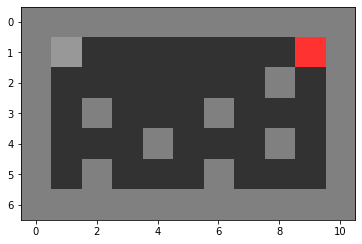

5 20
evaluation episode: 0 R: 14


In [18]:
agent.set_eval_mode()
for i in range(1):
    obs = env.reset()
    R = 0
    t = 0
    while True:
        # Uncomment to watch the behavior in a GUI window
        clear_output(wait=True)
        plt.imshow(env.render('rgb_array'))
        plt.show()
        action = agent.act(obs)
        obs, r, done, _ = env.step(action)
        print(action, r)

        R += r
        t += 1
        reset = t == 200
        time.sleep(0.5)
        if done or reset:
            break
    print('evaluation episode:', i, 'R:', R)